**OUTLIER DETECTION AND HANDLING - CATEGORICAL DATA**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import folium
from IPython.display import IFrame
import webbrowser

**Generating a pandas dataframe from the source .csv file**

In [2]:
# Set options to show all columns
pd.set_option('display.max_columns', None)

# Load csv file and generate pandas dataframe
input_csv = r'..\data\clean\after_step_3a_outliers_num.csv' # Fill your path to file
df_1 = pd.read_csv(input_csv, sep = ',')

df_1.head()

,id,locality_name,Postal_code,Price,Subtype,Number_of_bedrooms,Living_area,street,number,latitude,longitude,Open_fire,Swimming_Pool,hasTerrace,terraceSurface,gardenSurface,Kitchen_type,Number_of_facades,State_of_building,Furnished,epc,landSurface,price_per_sqm,price_per_sqm_land,Province,Assigned_City,Has_Assigned_City
0,20252354,Ronse,9600,319000,House,3,125,Rotterij,148,50.744176,3.625722,0,0,1,0,370,NaN,4,To renovate,0,F,767.0,2552.000000,415.906128,East Flanders,NaN,False
1,20251003,Geraardsbergen,9500,299999,House,3,167,Pirrestraat,17,50.752121,3.925495,0,0,1,0,895,Installed,2,Good,0,D,1050.0,1796.401198,285.713333,East Flanders,NaN,False
2,20252002,Mechelen,2800,275000,House,3,154,Caputsteenstraat,150,51.033269,4.491795,0,0,1,10,20,Semi equipped,2,To renovate,0,E,120.0,1785.714286,2291.666667,Antwerp,NaN,False
3,20252352,Gooik,1755,295000,House,3,172,Strijlandstraat,45,50.791877,4.084293,0,0,1,0,300,NaN,3,To renovate,0,F,309.0,1715.116279,954.692557,Brabant_Wallon,NaN,False
4,20251715,Dilbeek,1700,715000,House,3,280,Herdebeekstraat 94-94A,0,50.840610,4.228425,0,1,1,36,374,NaN,3,As new,0,C,374.0,2553.571429,1911.764706,Brabant_Wallon,NaN,False


**Categorical data - KITCHEN_TYPE**


*Checking for missing values and displaying the distribution of the amount of properties over the category*

In [3]:
#Checking the missing values
print("Mean: ", df_1['Kitchen_type'].isnull().mean()*100)
print("Count of missing values: ", df_1['Kitchen_type'].isnull().sum())

frequency = df_1['Kitchen_type'].value_counts()
print(frequency)

Mean:  37.92073292172874
Count of missing values:  1904
Kitchen_type
Installed             1699
Hyper equipped         621
Semi equipped          579
Not installed          175
Usa installed           22
Usa hyper equipped      17
Usa uninstalled          3
Usa semi equipped        1
Name: count, dtype: int64


In [4]:
#Dealing with the high number of missing values
#df['Kitchen_type'] = df['Kitchen_type'].apply(lambda x: 'Missing' if pd.isna(x) else x)

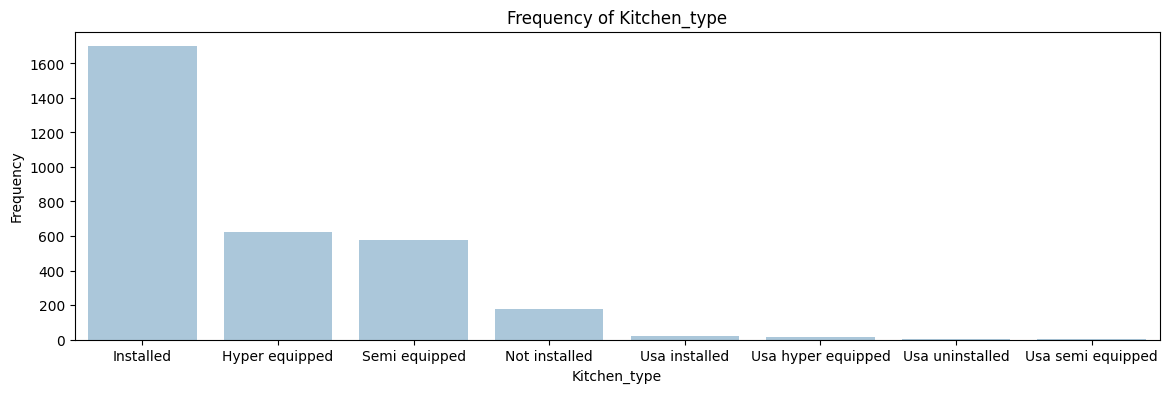

In [5]:
#Detecting Outliers on plot

plt.figure(figsize=(14, 4))
sns.barplot(x=frequency.index, y=frequency.values, color='#A3C9E2')
plt.title('Frequency of Kitchen_type')
plt.xlabel('Kitchen_type')
plt.ylabel('Frequency')
plt.show()

*Creating a frequency dataframe and Determining rare values*

In [6]:
#Creating a seperate frequency dataframe

frequency_df = frequency.reset_index()
frequency_df.columns = ['Kitchen_type', 'count']

print(frequency_df)

         Kitchen_type  count
0           Installed   1699
1      Hyper equipped    621
2       Semi equipped    579
3       Not installed    175
4       Usa installed     22
5  Usa hyper equipped     17
6     Usa uninstalled      3
7   Usa semi equipped      1


In [7]:
#Determing the rare values (threshold 5%)
threshold = 0.05 * len(df_1)  
rare_categories = frequency[frequency < threshold]

print("Rare Values:", rare_categories)

Rare Values: Kitchen_type
Not installed         175
Usa installed          22
Usa hyper equipped     17
Usa uninstalled         3
Usa semi equipped       1
Name: count, dtype: int64


In [8]:
#Dealing with missing values (Imputation)

df_1['Kitchen_type'] = df_1['Kitchen_type'].fillna(df_1['Kitchen_type'].mode()[0])
frequency = df_1['Kitchen_type'].value_counts()
frequency

Kitchen_type
Installed             3603
Hyper equipped         621
Semi equipped          579
Not installed          175
Usa installed           22
Usa hyper equipped      17
Usa uninstalled          3
Usa semi equipped        1
Name: count, dtype: int64

In [9]:
#Assign the rare value to another value
category_map = {'Usa hyper equipped': 'Hyper equipped', 'Usa semi equipped': 'Semi equipped', 'Usa uninstalled':'Not installed', 'Usa installed':'Installed'}
df_1['Kitchen_type'] = df_1['Kitchen_type'].map(category_map).fillna(df_1['Kitchen_type'])

frequency = df_1['Kitchen_type'].value_counts()
frequency

Kitchen_type
Installed         3625
Hyper equipped     638
Semi equipped      580
Not installed      178
Name: count, dtype: int64

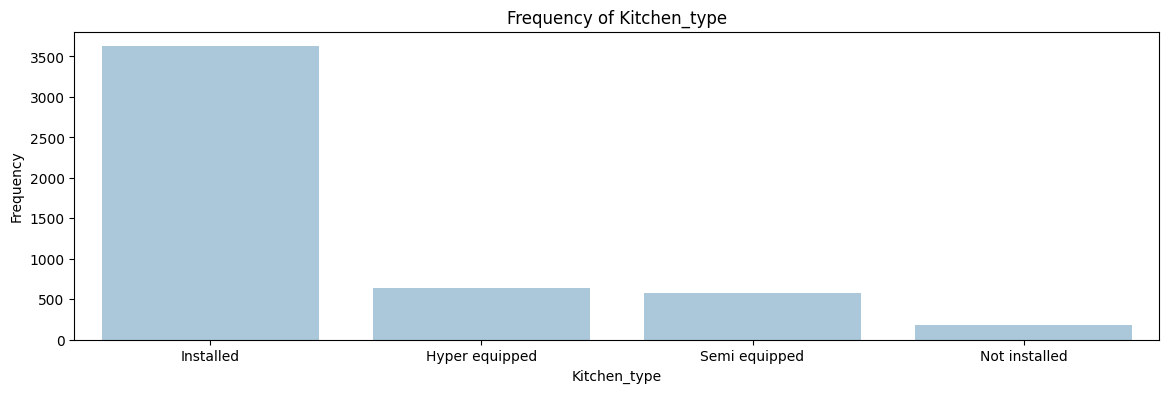

In [10]:
#Showing the final distrubution

plt.figure(figsize=(14, 4))
sns.barplot(x=frequency.index, y=frequency.values, color='#A3C9E2')
plt.title('Frequency of Kitchen_type')
plt.xlabel('Kitchen_type')
plt.ylabel('Frequency')
plt.show()

*Encoding - label encoding*

In [11]:
#This categorical data has a natural order we encode it in a way that reflects this ordering. We will use Label Encoding.
order = ['Not installed', 'Installed', 'Semi equipped', 'Hyper equipped']

category_mapping = {category: rank for rank, category in enumerate(order)}

df_1['Kitchen_type_encoded'] = df_1['Kitchen_type'].map(category_mapping)

frequency = df_1['Kitchen_type_encoded'].value_counts()
frequency

Kitchen_type_encoded
1    3625
3     638
2     580
0     178
Name: count, dtype: int64

**State_of_building**

*Checking for missing values and displaying the distribution of the amount of properties over the category*

Mean:  9.460266879107747
Count of missing values:  475
State_of_building
Good              1990
To renovate        866
As new             851
To be done up      540
Just renovated     269
To restore          30
Name: count, dtype: int64


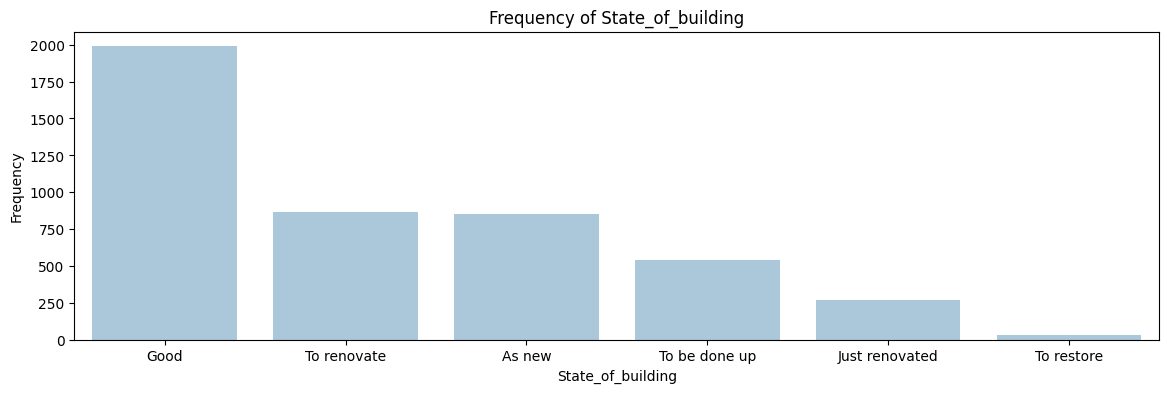

In [12]:
#Checking the missing values
print("Mean: ", df_1['State_of_building'].isnull().mean()*100)
print("Count of missing values: ", df_1['State_of_building'].isnull().sum())

frequency = df_1['State_of_building'].value_counts()
print(frequency)

#Detecting Outliers on plot

plt.figure(figsize=(14, 4))
sns.barplot(x=frequency.index, y=frequency.values, color='#A3C9E2')
plt.title('Frequency of State_of_building')
plt.xlabel('State_of_building')
plt.ylabel('Frequency')
plt.show()

*Dealing with missing values (Imputation)*

In [13]:
#Dealing with missing values (Imputation)

df_1['State_of_building'] = df_1['State_of_building'].fillna(df_1['State_of_building'].mode()[0])
frequency = df_1['State_of_building'].value_counts()
frequency

#Missing is also a possibility here???

#df['State_of_building'] = df['State_of_building'].fillna('Missing')

State_of_building
Good              2465
To renovate        866
As new             851
To be done up      540
Just renovated     269
To restore          30
Name: count, dtype: int64

*Creating a separate frequency dataframe and Determining rare values*

In [14]:
#Creating a seperate frequency dataframe

frequency_df = frequency.reset_index()
frequency_df.columns = ['State_of_building', 'count']

print(frequency_df)

  State_of_building  count
0              Good   2465
1       To renovate    866
2            As new    851
3     To be done up    540
4    Just renovated    269
5        To restore     30


In [15]:
#Determing the rare values (threshold 5%)
threshold = 0.05 * len(df_1)  
rare_categories = frequency[frequency < threshold]

print("Rare Values:", rare_categories)

Rare Values: State_of_building
To restore    30
Name: count, dtype: int64


In [16]:
#Assign the rare value to another value
category_map = {'To restore': 'To renovate'}
df_1['State_of_building'] = df_1['State_of_building'].map(category_map).fillna(df_1['State_of_building'])

frequency = df_1['State_of_building'].value_counts()
frequency

State_of_building
Good              2465
To renovate        896
As new             851
To be done up      540
Just renovated     269
Name: count, dtype: int64

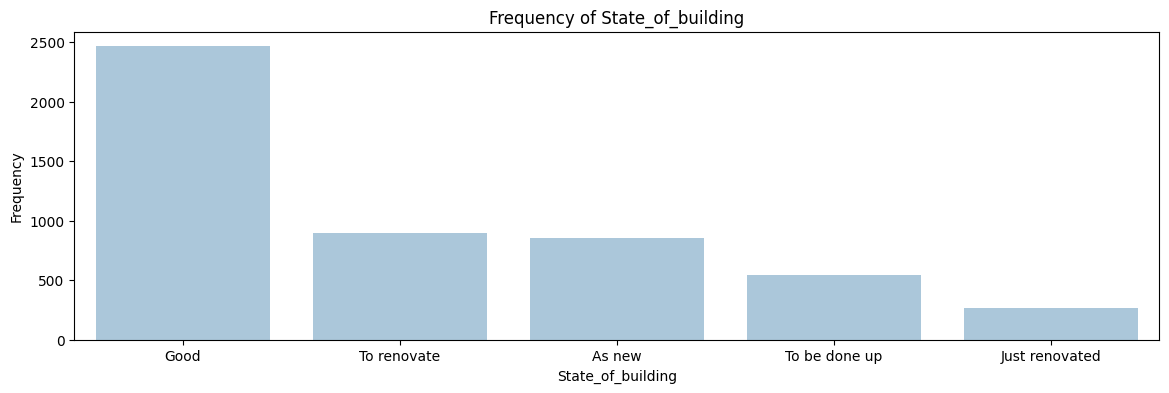

In [17]:
#showing the final distrubution

plt.figure(figsize=(14, 4))
sns.barplot(x=frequency.index, y=frequency.values, color='#A3C9E2')
plt.title('Frequency of State_of_building')
plt.xlabel('State_of_building')
plt.ylabel('Frequency')
plt.show()

*Encoding - label encoding*

In [18]:
#This categorical data has a natural order we encode it in a way that reflects this ordering. We will use Label Encoding.
order = ['To renovate', 'To be done up', 'Good', 'Just renovated', 'As new']

category_mapping = {category: rank for rank, category in enumerate(order)}

df_1['State_of_building_encoded'] = df_1['State_of_building'].map(category_mapping)

frequency = df_1['State_of_building_encoded'].value_counts()
frequency

State_of_building_encoded
2    2465
0     896
4     851
1     540
3     269
Name: count, dtype: int64

**Categorical data: EPC**

*Checking for missing values and displaying the distribution of the amount of properties over the category*

Mean:  4.680342561242781
Count of missing values:  235
epc
F      990
C      903
D      901
B      763
E      562
A      420
G      187
A+      47
A++     13
Name: count, dtype: int64


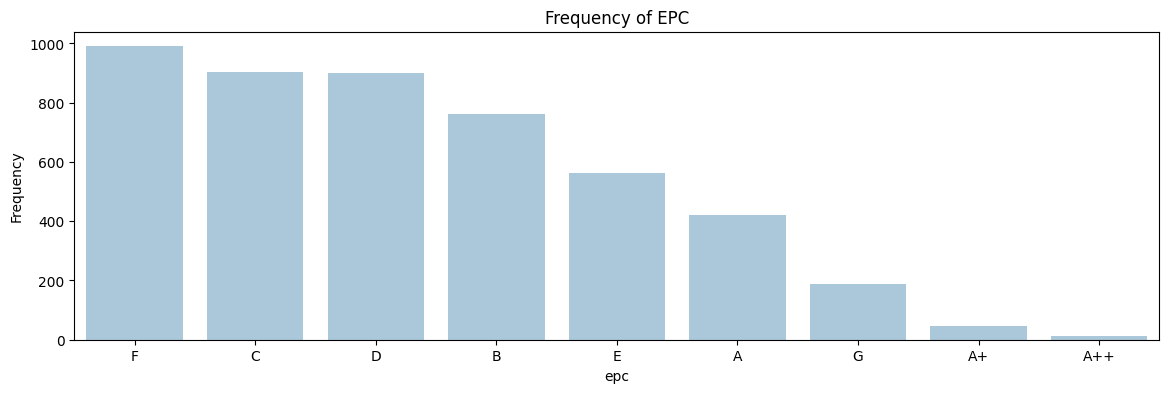

In [19]:
#Checking the missing values
print("Mean: ", df_1['epc'].isnull().mean()*100)
print("Count of missing values: ", df_1['epc'].isnull().sum())

frequency = df_1['epc'].value_counts()
print(frequency)

#Detecting Outliers on plot

plt.figure(figsize=(14, 4))
sns.barplot(x=frequency.index, y=frequency.values, color='#A3C9E2')
plt.title('Frequency of EPC')
plt.xlabel('epc')
plt.ylabel('Frequency')
plt.show()

*Creating a separate frequency dataframe and Determining rare values*

In [20]:
#Creating a seperate frequency dataframe

frequency_df = frequency.reset_index()
frequency_df.columns = ['epc', 'count']

print(frequency_df)

   epc  count
0    F    990
1    C    903
2    D    901
3    B    763
4    E    562
5    A    420
6    G    187
7   A+     47
8  A++     13


In [21]:
#Determining the rare values (threshold 5%)
threshold = 0.05 * len(df_1)  
rare_categories = frequency[frequency < threshold]

print("Rare Values:", rare_categories)

Rare Values: epc
G      187
A+      47
A++     13
Name: count, dtype: int64


*Dealing with missing values (Imputation)*

In [22]:
#Dealing with missing values (Imputation)

df_1['epc'] = df_1['epc'].fillna(df_1['epc'].mode()[0])
frequency = df_1['epc'].value_counts()
frequency

#Missing is also a possibility here???

#df['epc'] = df['epc'].fillna('Missing')

epc
F      1225
C       903
D       901
B       763
E       562
A       420
G       187
A+       47
A++      13
Name: count, dtype: int64

In [23]:
#Assign the rare value to another value (EPC G only exist in Brussels and Wallonia)
category_map = {'A+': 'A', 'A++': 'A', 'G':'F'}
df_1['epc'] = df_1['epc'].map(category_map).fillna(df_1['epc'])

frequency = df_1['epc'].value_counts()
frequency

epc
F    1412
C     903
D     901
B     763
E     562
A     480
Name: count, dtype: int64

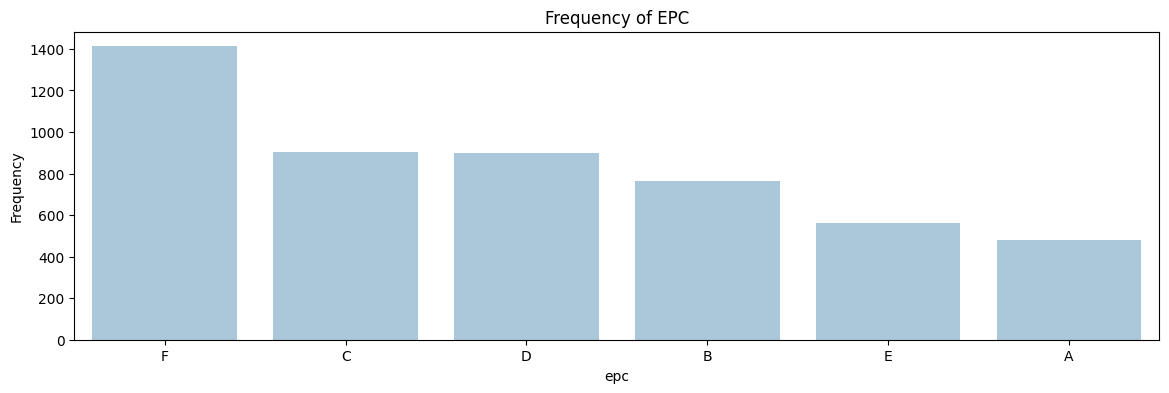

In [24]:
#Showing the final distrubution

plt.figure(figsize=(14, 4))
sns.barplot(x=frequency.index, y=frequency.values, color='#A3C9E2')
plt.title('Frequency of EPC')
plt.xlabel('epc')
plt.ylabel('Frequency')
plt.show()

*Encoding - label encoding*

In [25]:
#This categorical data has a natural order we encode it in a way that reflects this ordering. We will use Label Encoding.
order = ['F', 'E', 'D', 'C', 'B', 'A']

category_mapping = {category: rank for rank, category in enumerate(order)}

df_1['EPC_encoded'] = df_1['epc'].map(category_mapping)

frequency = df_1['EPC_encoded'].value_counts()
frequency

EPC_encoded
0    1412
3     903
2     901
4     763
1     562
5     480
Name: count, dtype: int64

**Saving data to a new .csv file and a .pkl file**

In [26]:
# Save data to new csv file

output_csv = r'..\data\clean\after_step_3b_outliers_cat.csv'  # Fill your path to file
df_1.to_csv(output_csv, index=False)


# Save data to new pkl file

import pickle
output_pkl = r'..\data\clean\after_step_3b_outliers_cat.pkl' # Fill your path to file
with open(output_pkl, 'wb') as f:
    pickle.dump(df_1, f)
